При фиксированном seed=42 поэкспериментируйте с параметрами алгоритма differential_evolution: strategy, popsize, mutation.

Постройте графики количества итераций (nit) оптимизации функции ackley от значения параметра.

Подробнее о результате выдачи тут.

In [159]:
import numpy as np
from scipy.optimize import differential_evolution
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [199]:
# Обозначил списки параметров для метода differential_evolution

In [50]:
_strategy = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp', 'randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand1bin']

In [32]:
_popsize = list(range(1,11))

In [40]:
_mutation = np.linspace(0.5,1.9,6)

In [200]:
# Функция по перебору вышеуказанных параметров и созданию 
# списка количеств итераций в зависимости от изменения данных параметров

In [59]:
def ackley_nit_for_graph(_strtg: list,  _popsz: list, _muttn: np.ndarray) -> list:
  def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

  bounds = [(-10, 10), (-10, 10)]

  nit_arr = []

  for i in range(len(_strtg)):
    for j in range(len(_popsz)):
      for k in range(len(_muttn)):
        result = differential_evolution(ackley, bounds, seed=42, strategy=_strtg[i], popsize=_popsz[j], mutation=_muttn[k])
        nit_arr.append([_strtg[i], _popsz[j], _muttn[k], result.nit])

  return nit_arr

In [201]:
# Создал датафрейм из полученного списка итераций 
# для более удобной работы с данными через matplotlib

In [116]:
arr_for_graph = ackley_nit_for_graph(_strategy,  _popsize, _mutation)    # вызов функции ackley_nit_for_graph и запись результата в переменную

In [117]:
df = pd.DataFrame(np.array(arr_for_graph), columns=['strategy', 'popsize', 'mutation', 'nit'])   # создание датафрейма

In [118]:
df['popsize'] = df['popsize'].astype(int)      # т.к. результат в данных столбцах получился в виде строковых значений, перевел их в int и float
df['mutation'] = df['mutation'].astype(float)
df['nit'] = df['nit'].astype(float)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   strategy  600 non-null    object 
 1   popsize   600 non-null    int64  
 2   mutation  600 non-null    float64
 3   nit       600 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 18.9+ KB


In [120]:
df_strategy = df[['strategy', 'nit']].groupby('strategy').mean()   # сгруппировал и усреднил значения исследуемых параметров

df_popsize = df[['popsize', 'nit']].groupby('popsize').mean()

df_mutation = df[['mutation', 'nit']].groupby('mutation').mean()

In [121]:
df_strategy

,nit
strategy,
best1bin,86.233
best1exp,134.617
best2bin,488.017
best2exp,601.083
currenttobest1bin,829.167
currenttobest1exp,836.750
rand1bin,208.050
rand1exp,301.883
randtobest1bin,210.150


In [122]:
df_popsize

,nit
popsize,
1,311.550
2,311.550
3,288.400
4,385.517
5,420.783
6,432.800
7,449.183
8,462.133
9,476.100


In [123]:
df_mutation

,nit
mutation,
0.500,231.620
0.780,287.110
1.060,319.810
1.340,461.050
1.620,530.420
1.900,572.190


In [202]:
# Создал барчарты:

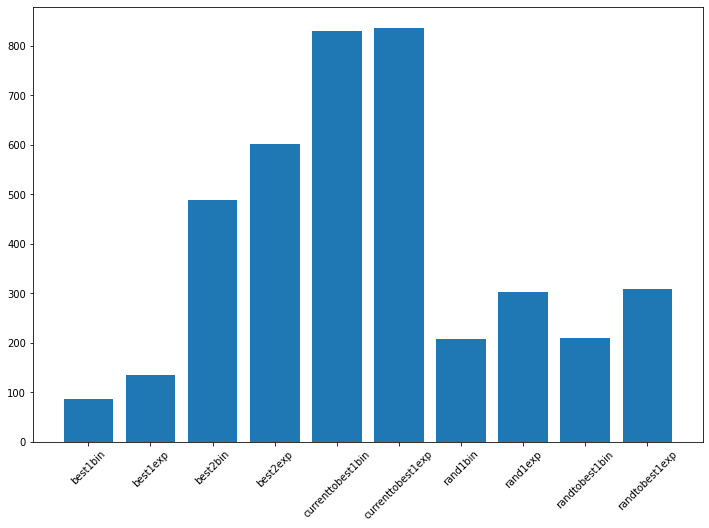

In [152]:
plt.figure(figsize=[12,8])
plt.bar(df_strategy.index, df_strategy['nit'])
plt.xticks(rotation=45)
plt.show()

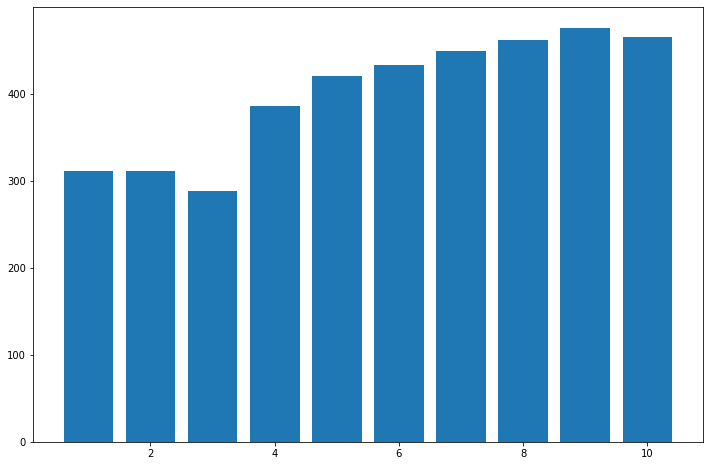

In [154]:
plt.figure(figsize=[12,8])
plt.bar(df_popsize.index, df_popsize['nit'])
plt.show()

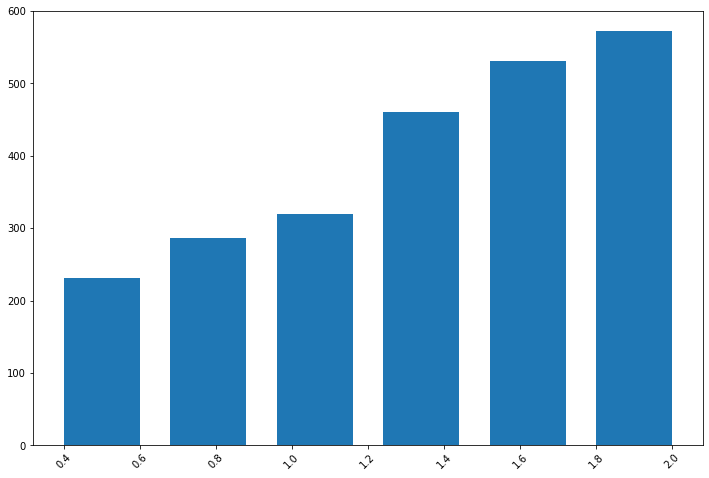

In [158]:
plt.figure(figsize=[12,8])
plt.bar(df_mutation.index, df_mutation['nit'], width=0.2)
plt.xticks(rotation=45)
plt.show()

Дополнительное задание

Поэкспериментируйте с параметрами и оптимизацией через minimize:

In [160]:
x0 = [0,0]

result_m = minimize(ackley, x0,  method='Nelder-Mead')
result_m

 final_simplex: (array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.60675049e-05, -8.45336914e-06],
       [-1.40380859e-06, -3.11279297e-05]]), array([4.44089210e-16, 5.13604405e-05, 8.81584216e-05]))
           fun: 4.440892098500626e-16
       message: 'Optimization terminated successfully.'
          nfev: 17
           nit: 8
        status: 0
       success: True
             x: array([0., 0.])

In [161]:
# Аналогичным способом перебрал различные методы, указанные в документации для minimize

def minimize_nit_for_graph(_mthd: list) -> list:
  def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

  bounds = [(-10, 10), (-10, 10)]

  nit_arr = []

  for i in range(len(_mthd)):
        result = minimize(ackley, x0,  method=_mthd[i])
        nit_arr.append([_mthd[i], result.nit])

  return nit_arr

In [188]:
_methods = ['Nelder-Mead', 'Powell', 'CG', 
            'BFGS', 'L-BFGS-B', 
            'TNC', 'SLSQP', 'trust-constr']

In [189]:
minimize_list = minimize_nit_for_graph(_methods)

In [195]:
df_minimize = pd.DataFrame(minimize_list, columns=['method', 'nit'])

<BarContainer object of 8 artists>

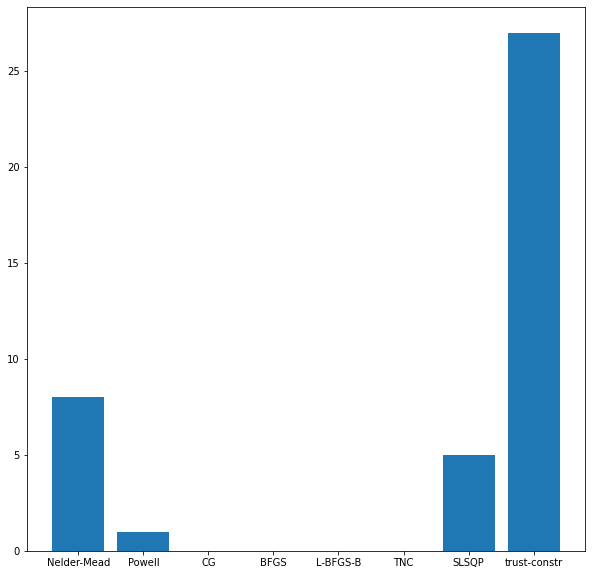

In [198]:
plt.figure(figsize=[10,10])
plt.bar(df_minimize['method'], df_minimize['nit'])

In [203]:
df_minimize

,method,nit
0,Nelder-Mead,8
1,Powell,1
2,CG,0
3,BFGS,0
4,L-BFGS-B,0
5,TNC,0
6,SLSQP,5
7,trust-constr,27
